# Lesson 4: Evaluate the Tuned Model

#### Project environment setup

- Install Tensorboard (if running locally)
```Python
!pip install tensorboard
```

### Explore results with Tensorboard

In [1]:
%load_ext tensorboard

In [2]:
port = %env PORT1
%tensorboard --logdir reward-logs --port $port --bind_all 

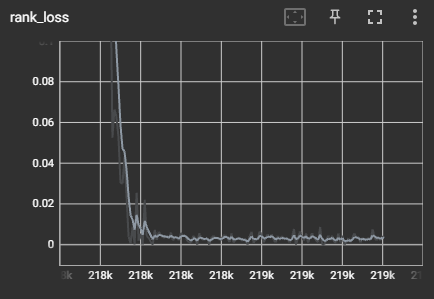
- We might want to train for fewer steps

In [3]:
# Look at what this directory has
%ls reward-logs

rlhf_526064905871_rlhf-train-template-20231025162358_rewardmodeltrainer_-5577427763033276416_tensorboard_metrics_train_events.out.tfevents.1698255866.t1v-n-807add68-w-1.1.0.v2*


In [4]:
port = %env PORT2
%tensorboard --logdir reinforcer-logs --port $port --bind_all

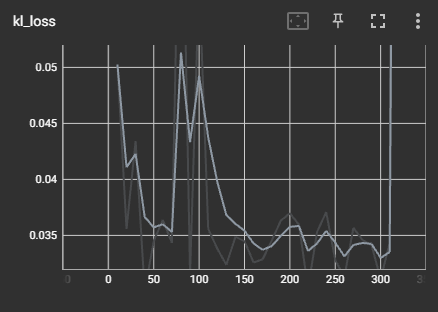
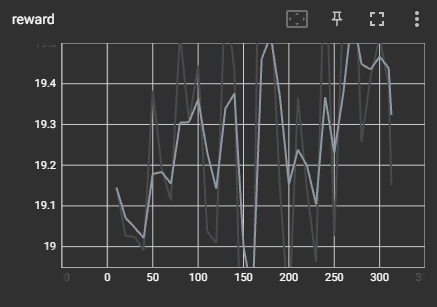
- We would expect an upward trend instead of this
- Indication model isn't learning and maybe underfitting; this probably was the expected result as these were results from 1% of the dataset

In [5]:
port = %env PORT3
%tensorboard --logdir reinforcer-fulldata-logs --port $port --bind_all #Full dataset

- We would expect the results to look more like this:
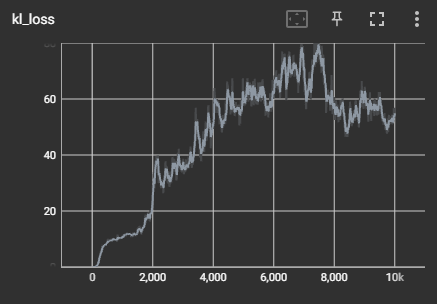
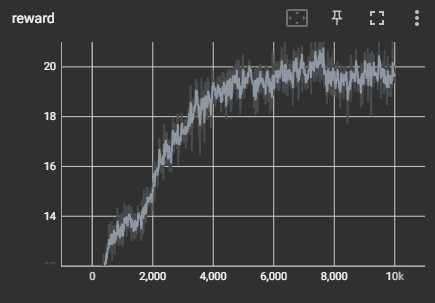

The dictionary of 'parameter_values' defined in the previous lesson:

In [6]:
parameter_values={
        "preference_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text_small/summarize_from_feedback_tfds/comparisons/train/*.jsonl",
        "prompt_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text_small/reddit_tfds/train/*.jsonl",
        "eval_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text_small/reddit_tfds/val/*.jsonl",
        "large_model_reference": "llama-2-7b",
        "reward_model_train_steps": 1410,
        "reinforcement_learning_train_steps": 320,
        "reward_model_learning_rate_multiplier": 1.0,
        "reinforcement_learning_rate_multiplier": 1.0,
        "kl_coeff": 0.1,
        "instruction":\
    "Summarize in less than 50 words"}

**Note:** Here, we are using "text_small" for our datasets for learning purposes. However for the results that we're evaluating in this lesson, the team used the full dataset with the following hyperparameters:

```Python
parameter_values={
        "preference_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text/summarize_from_feedback_tfds/comparisons/train/*.jsonl",
        "prompt_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/train/*.jsonl",
        "eval_dataset": \
    "gs://vertex-ai/generative-ai/rlhf/text/reddit_tfds/val/*.jsonl",
        "large_model_reference": "llama-2-7b",
        "reward_model_train_steps": 10000,
        "reinforcement_learning_train_steps": 10000, 
        "reward_model_learning_rate_multiplier": 1.0,
        "reinforcement_learning_rate_multiplier": 0.2,
        "kl_coeff": 0.1,
        "instruction":\
    "Summarize in less than 50 words"}
```

### Evaluate using the tuned and untuned model

In [7]:
import json

In [8]:
eval_tuned_path = 'eval_results_tuned.jsonl'

In [9]:
eval_data_tuned = []

In [10]:
with open(eval_tuned_path) as f:
    for line in f:
        eval_data_tuned.append(json.loads(line)) #append data into empty list

In [11]:
# Import for printing purposes
from utils import print_d

In [12]:
# Look at the result produced by the tuned model
print_d(eval_data_tuned[0])

--------------------------------------------------
key:inputs

val
  --------------------------------------------------
  key:inputs_pretokenized

  val:Summarize in less than 50 words.


Before anything, not a sad story or anything. My country's equivalent to Valentine's Day is coming and I had this pretty simple idea to surprise my girlfriend and it would involve giving her some roses. The thing is, although I know she would appreciate my intention in and of itself, I don't know if she would like the actual flowers and such, so I wanted to find out if she likes roses and if she would like getting some, but without her realizing it so as not to spoil the surprise. Any ideas on how to get that information out of her? [summary]: 
  --------------------------------------------------
  key:targets_pretokenized

  val:
--------------------------------------------------
key:prediction

val:My country's equivalent to Valentine's Day is coming. Want to surprise my girlfriend with roses but do

In [13]:
eval_untuned_path = 'eval_results_untuned.jsonl'

In [14]:
eval_data_untuned = []

In [15]:
with open(eval_untuned_path) as f:
    for line in f:
        eval_data_untuned.append(json.loads(line))

In [16]:
# Look at the result produced by the untuned model
print_d(eval_data_untuned[0])

--------------------------------------------------
key:inputs

val
  --------------------------------------------------
  key:inputs_pretokenized

  val:Summarize in less than 50 words.


Before anything, not a sad story or anything. My country's equivalent to Valentine's Day is coming and I had this pretty simple idea to surprise my girlfriend and it would involve giving her some roses. The thing is, although I know she would appreciate my intention in and of itself, I don't know if she would like the actual flowers and such, so I wanted to find out if she likes roses and if she would like getting some, but without her realizing it so as not to spoil the surprise. Any ideas on how to get that information out of her? [summary]: 
  --------------------------------------------------
  key:targets_pretokenized

  val:
--------------------------------------------------
key:prediction

val:The author wants to surprise his girlfriend with roses on Valentine's Day but he doesn't know if she l

### Explore the results side by side in a dataframe

In [17]:
# Extract all the prompts
prompts = [sample['inputs']['inputs_pretokenized']
           for sample in eval_data_tuned]

In [18]:
# Completions from the untuned model
untuned_completions = [sample['prediction']
                       for sample in eval_data_untuned]

In [19]:
# Completions from the tuned model
tuned_completions = [sample['prediction']
                     for sample in eval_data_tuned]

- Now putting all together in one big dataframe

In [20]:
import pandas as pd

In [21]:
results = pd.DataFrame(
    data={'prompt': prompts,
          'base_model':untuned_completions,
          'tuned_model': tuned_completions})

In [22]:
pd.set_option('display.max_colwidth', None)

In [23]:
# Print the results
results

,prompt,base_model,tuned_model
0,"Summarize in less than 50 words.\n\n\nBefore anything, not a sad story or anything. My country's equivalent to Valentine's Day is coming and I had this pretty simple idea to surprise my girlfriend and it would involve giving her some roses. The thing is, although I know she would appreciate my intention in and of itself, I don't know if she would like the actual flowers and such, so I wanted to find out if she likes roses and if she would like getting some, but without her realizing it so as not to spoil the surprise. Any ideas on how to get that information out of her? [summary]:",The author wants to surprise his girlfriend with roses on Valentine's Day but he doesn't know if she likes roses. He wants to find out without spoiling the surprise.,My country's equivalent to Valentine's Day is coming. Want to surprise my girlfriend with roses but don't know if she would like getting some. Any ideas on how to get that information out of her without spoiling the surprise
1,"Summarize in less than 50 words.\n\n\nFor most of high school, I've been the go to ""computer kid."" I'll be the first to admit that I know a lot about how computers work, and often fix things for teachers before the IT guys have a chance to get a whack at them. I worked at a computer repair shop for half a year as a technician. I've done the typical tech guy thing and drooled over new computers that come out (read: Wired/PopSci/2600 articles and centerfolds). \n\nThat said, I have NO IDEA what kind of computer to get for college. I've always wanted to buy a ton of parts and build my own ""super"" desktop, but I for sure need a laptop. If everything goes according to plan, I'm enrolling at Champlain College next Fall to double major in Computer Network Information Security and Digital Forensics. \n\nA lot of you probably already know this, but this major involves a lot of virtual desktops. Essentially I set up entire networks on my own rig and then go in and play around with them, all from one computer. It takes a lot of processing power and hard drive space.\n\nOver the years I've built up several stereotypes about different brands, operating systems, products... Recently, my mind has been opened back up and I'm willing to take a look at anything, even a Dell or an Asus.\n\nIt's recently been brought to my attention that Macs are actually pretty good. I've always been a notorious Windows-only-guy. I finally decided to bite my tongue and take a look under the hood, and my god are these things powerful... I guess it really does help making everything but the processor in-house.\n\nAnywho, what I really need is suggestions that might work well for my major, hopefully staying under a budget of $1600. Also, what are the big differences between a MacBook and MacBook Pro? [summary]:","A high school senior who is going to major in Computer Network Information Security and Digital Forensics needs a laptop that is powerful enough to run virtual desktops. He is open to suggestions of any brands, but prefers Macs. He is looking for a laptop under $1600 and wants to know the difference between MacBook and","Been the go to ""computer kid"" in high school. Majoring in Computer Network Information Security and Digital Forensics. Need suggestions for a laptop under 1600. What are the big differences between a MacBook and MacBook Pro"
2,"Summarize in less than 50 words.\n\n\nSo I graduated in may 2014 in the DC area but couldn't start applying to jobs till April of this year due to family circumstances. So far I've applied to nearly 50+ places, 4 recruiters contacted me and added me to their available candidates list after a small interview (one of them got me a small office assignment but that's over) and gotten two interviews by myself (none of which panned out). I have experience in office software and am pretty well versed in excel (i'd say a little less than advanced but a lot more than proficient) and advanced mathematics. I have a GPA high